In [ ]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as npca

In [ ]:
df = pd.read_csv("TSLA.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df.shape

(2956, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2956.000000,2956.000000,2956.000000,2956.000000,2956.000000,2.956000e+03
mean,138.691296,141.771603,135.425953,138.762183,138.762183,3.131449e+07
std,250.044839,255.863239,243.774157,250.123115,250.123115,2.798383e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,19.627000,20.402000,19.127500,19.615000,19.615000,1.310288e+07
50%,46.656999,47.487001,45.820002,46.545000,46.545000,2.488680e+07
75%,68.057001,69.357500,66.911501,68.103998,68.103998,3.973875e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [ ]:
 df[df.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


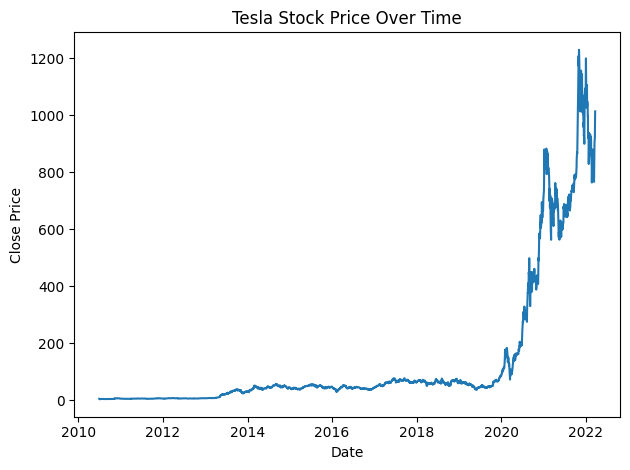

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price Over Time')
plt.tight_layout()
plt.show()

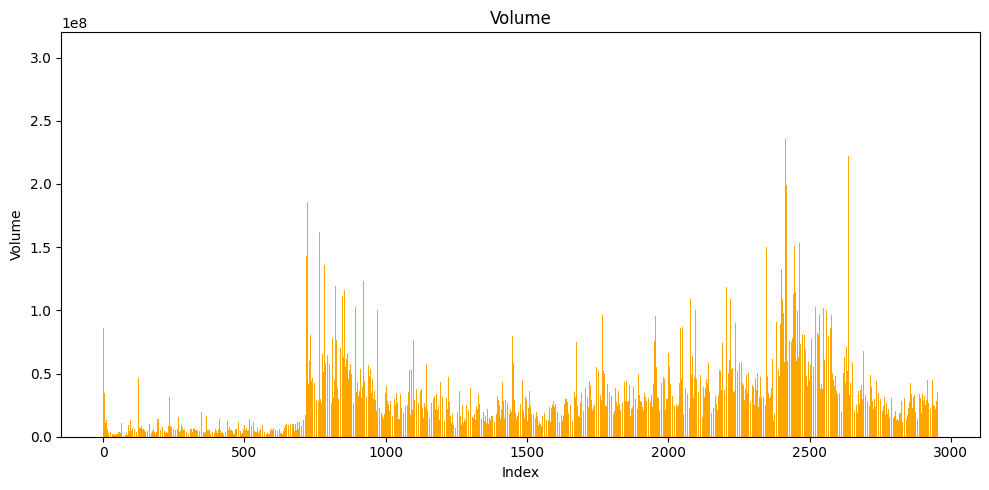

In [ ]:


plt.figure(figsize=(10, 5))
plt.bar(df.index, df['Volume'], color='orange')
plt.title('Volume')
plt.xlabel('Index')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()


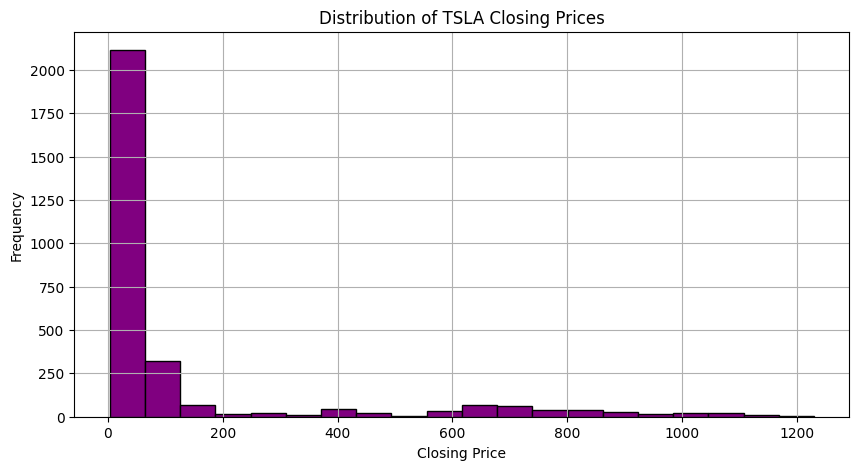

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['Close'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of TSLA Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
features = ["Open", "High", "Low", "Volume"]
target = "Close"

In [ ]:
X = df[features]
y = df[target]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", mse)
print("R^2 Score :", r2)
print("Mean Absolute Error (MAE):", mae)
accuracy_like = 100 - (mae / np.mean(y_test) * 100)
print("Approximate Accuracy (%):", accuracy_like)



Mean Squared Error : 78.18460756455126
R^2 Score : 0.9986679860526639
Mean Absolute Error (MAE): 3.096727093656798
Approximate Accuracy (%): 97.75050444154814


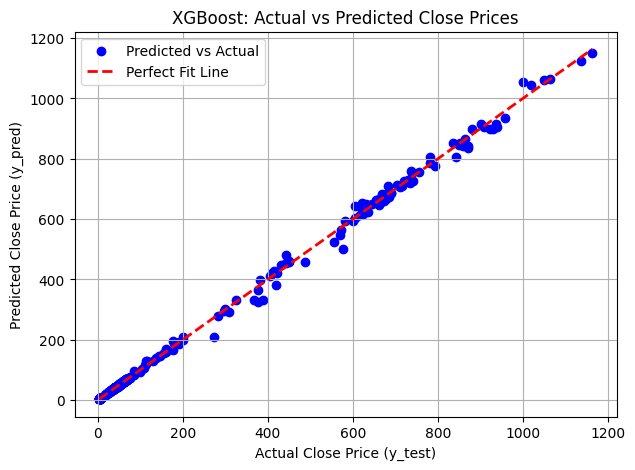

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit Line')
plt.xlabel('Actual Close Price (y_test)')
plt.ylabel('Predicted Close Price (y_pred)')
plt.title('XGBoost: Actual vs Predicted Close Prices')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
len(y_test)

592

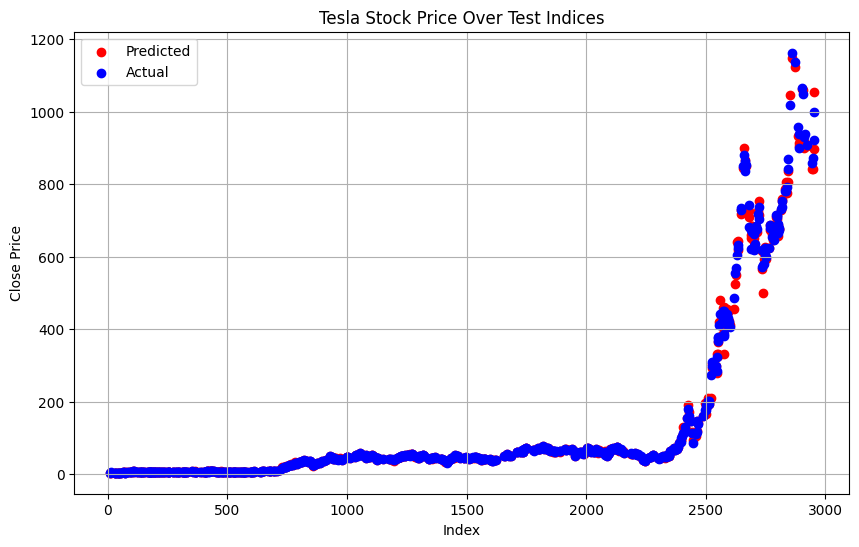

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_pred, color='red', label='Predicted')
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.title('Tesla Stock Price Over Test Indices')
plt.grid(True)
plt.show()